In [131]:

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, f1_score,recall_score,classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [133]:
# Load the dataset
data = pd.read_csv("train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [134]:
# Load the dataset
data2 = pd.read_csv("test.csv")
data2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [135]:
# Load the dataset
data3 = pd.read_csv("gender_submission.csv")
data3

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [136]:
data2['Survived'] = data3['Survived']
data2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [137]:
#the shape of the data how many rows and cols it contains
data.shape

(891, 12)

In [138]:
data["Cabin"] = data["Cabin"].fillna("unknown")
data["Ticket"] = data["Ticket"].fillna("unknown")
data["Sex"] = data["Sex"].fillna("unknown")
data["Embarked"] = data["Embarked"].fillna("unknown")
data["Name"] = data["Name"].fillna("unknown")
data["Survived"] = data["Survived"].fillna(0)
data["Pclass"] = data["Pclass"].fillna(data["Pclass"].mean())
data["Age"] = data["Age"].fillna(data["Age"].mean())
data["SibSp"] = data["SibSp"].fillna(data["SibSp"].mean())
data["Parch"] = data["Parch"].fillna(data["Parch"].mean())
data["Fare"] = data["Fare"].fillna(data["Fare"].mean())
#################################
data2["Cabin"] = data2["Cabin"].fillna("unknown")
data2["Ticket"] = data2["Ticket"].fillna("unknown")
data2["Sex"] = data2["Sex"].fillna("unknown")
data2["Embarked"] = data2["Embarked"].fillna("unknown")
data2["Name"] = data2["Name"].fillna("unknown")
data2["Survived"] = data2["Survived"].fillna(0)
data2["Pclass"] = data2["Pclass"].fillna(data["Pclass"].mean())
data2["Age"] = data2["Age"].fillna(data["Age"].mean())
data2["SibSp"] = data2["SibSp"].fillna(data["SibSp"].mean())
data2["Parch"] = data2["Parch"].fillna(data["Parch"].mean())
data2["Fare"] = data2["Fare"].fillna(data["Fare"].mean())

In [139]:
data = data.drop("PassengerId", axis=1)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,unknown,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,unknown,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,unknown,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,unknown,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,unknown,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [140]:
data2 = data2.drop("PassengerId", axis=1)
data2

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,unknown,Q,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,unknown,S,1
2,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,unknown,Q,0
3,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,unknown,S,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,unknown,S,1
...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,29.699118,0,0,A.5. 3236,8.0500,unknown,S,0
414,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,1
415,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,unknown,S,0
416,3,"Ware, Mr. Frederick",male,29.699118,0,0,359309,8.0500,unknown,S,0


In [141]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,unknown,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,unknown,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,unknown,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,unknown,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,unknown,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [142]:
data = pd.concat([data, data2], ignore_index=True)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,unknown,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,unknown,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,unknown,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,0,3,"Spector, Mr. Woolf",male,29.699118,0,0,A.5. 3236,8.0500,unknown,S
1305,1,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,unknown,S
1307,0,3,"Ware, Mr. Frederick",male,29.699118,0,0,359309,8.0500,unknown,S


In [143]:
# here we split features and output
X = data.drop("Survived", axis=1)
y = data['Survived']
X


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,unknown,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,unknown,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,unknown,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,29.699118,0,0,A.5. 3236,8.0500,unknown,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,unknown,S
1307,3,"Ware, Mr. Frederick",male,29.699118,0,0,359309,8.0500,unknown,S


In [144]:
#here we do one-hot encoding to turn string data into numerical
cat_features = ['Name', 'Sex','SibSp','Parch','Ticket','Cabin','Embarked','Pclass']


ct = ColumnTransformer([('encoder', OneHotEncoder(), cat_features)], remainder='passthrough')


data_encoded = ct.fit_transform(X)


In [145]:
X=data_encoded

In [146]:
# here we split features and output
X2 = data2.drop("Survived", axis=1)
y2 = data2['Survived']
X2
#here we do one-hot encoding to turn string data into numerical
cat_features = ['Name', 'Sex','SibSp','Parch','Ticket','Cabin','Embarked','Pclass']


ct = ColumnTransformer([('encoder', OneHotEncoder(), cat_features)], remainder='passthrough')


data_encoded = ct.fit_transform(X2)

In [147]:

X2 = data_encoded

In [148]:
print(X)

  (0, 155)	1.0
  (0, 1308)	1.0
  (0, 1310)	1.0
  (0, 1316)	1.0
  (0, 2044)	1.0
  (0, 2439)	1.0
  (0, 2442)	1.0
  (0, 2446)	1.0
  (0, 2447)	22.0
  (0, 2448)	7.25
  (1, 286)	1.0
  (1, 1307)	1.0
  (1, 1310)	1.0
  (1, 1316)	1.0
  (1, 2140)	1.0
  (1, 2359)	1.0
  (1, 2440)	1.0
  (1, 2444)	1.0
  (1, 2447)	38.0
  (1, 2448)	71.2833
  (2, 523)	1.0
  (2, 1307)	1.0
  (2, 1309)	1.0
  (2, 1316)	1.0
  (2, 2238)	1.0
  :	:
  (1306, 2439)	1.0
  (1306, 2442)	1.0
  (1306, 2446)	1.0
  (1306, 2447)	38.5
  (1306, 2448)	7.25
  (1307, 1227)	1.0
  (1307, 1308)	1.0
  (1307, 1309)	1.0
  (1307, 1316)	1.0
  (1307, 1903)	1.0
  (1307, 2439)	1.0
  (1307, 2442)	1.0
  (1307, 2446)	1.0
  (1307, 2447)	29.69911764705882
  (1307, 2448)	8.05
  (1308, 953)	1.0
  (1308, 1308)	1.0
  (1308, 1310)	1.0
  (1308, 1317)	1.0
  (1308, 1586)	1.0
  (1308, 2439)	1.0
  (1308, 2440)	1.0
  (1308, 2446)	1.0
  (1308, 2447)	29.69911764705882
  (1308, 2448)	22.3583


In [149]:
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [150]:
model =  LinearSVC(C=1.0, penalty='l2', loss='squared_hinge')

In [151]:
X_train.shape

(1178, 2449)

In [152]:
model.fit(X_train, y_train)

C:\Users\al_rehab\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [153]:
 #make prediction on test data
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [154]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('recall:', recall)
print('F1 Score:', f1)


Accuracy: 0.8473282442748091
Precision: 0.8913043478260869
recall: 0.7321428571428571
F1 Score: 0.8039215686274508


In [155]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        75
           1       0.89      0.73      0.80        56

    accuracy                           0.85       131
   macro avg       0.86      0.83      0.84       131
weighted avg       0.85      0.85      0.84       131



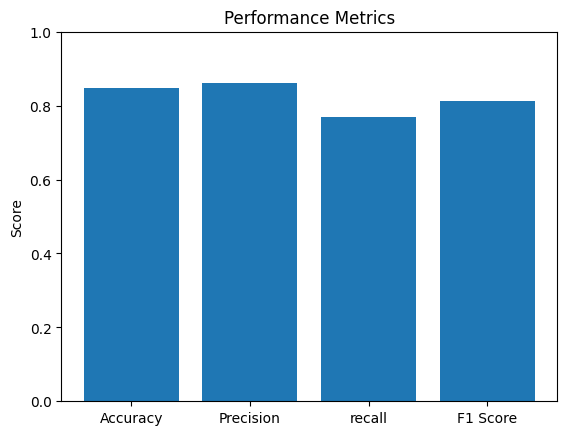

In [108]:
# Plot the accuracy of the model
plt.bar(['Accuracy', 'Precision',"recall", 'F1 Score'], [accuracy, precision,recall ,f1])
plt.ylim([0.0, 1.0])
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()

In [109]:
#confuision matrix

y_preds = model.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[68,  7],
       [13, 43]], dtype=int64)

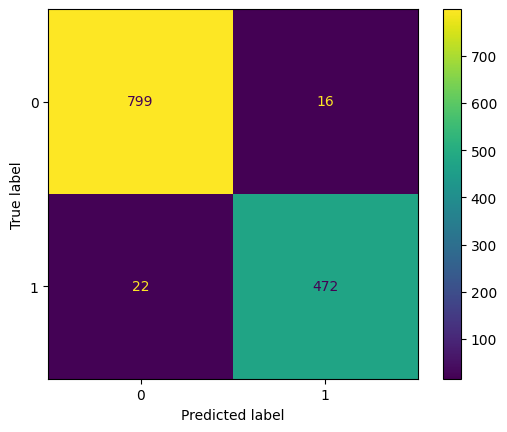

In [110]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=model, X=X, y=y);